<a href="https://colab.research.google.com/github/ll3091/ANLY-580-01-NLP-Project/blob/master/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project: Model Evaluation

In [0]:
# connect to Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

In [2]:
# move to results folder
% cd ./gdrive/'My Drive'/NLPProject/ModelTrainingOutput

/content/gdrive/My Drive/NLPProject/ModelTrainingOutput


In [0]:
# import packages
import json
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
!ls

MediumText  ShortText


## Short Texts

In [0]:
# collect file names
folder = './ShortText/'
files = os.listdir(folder)

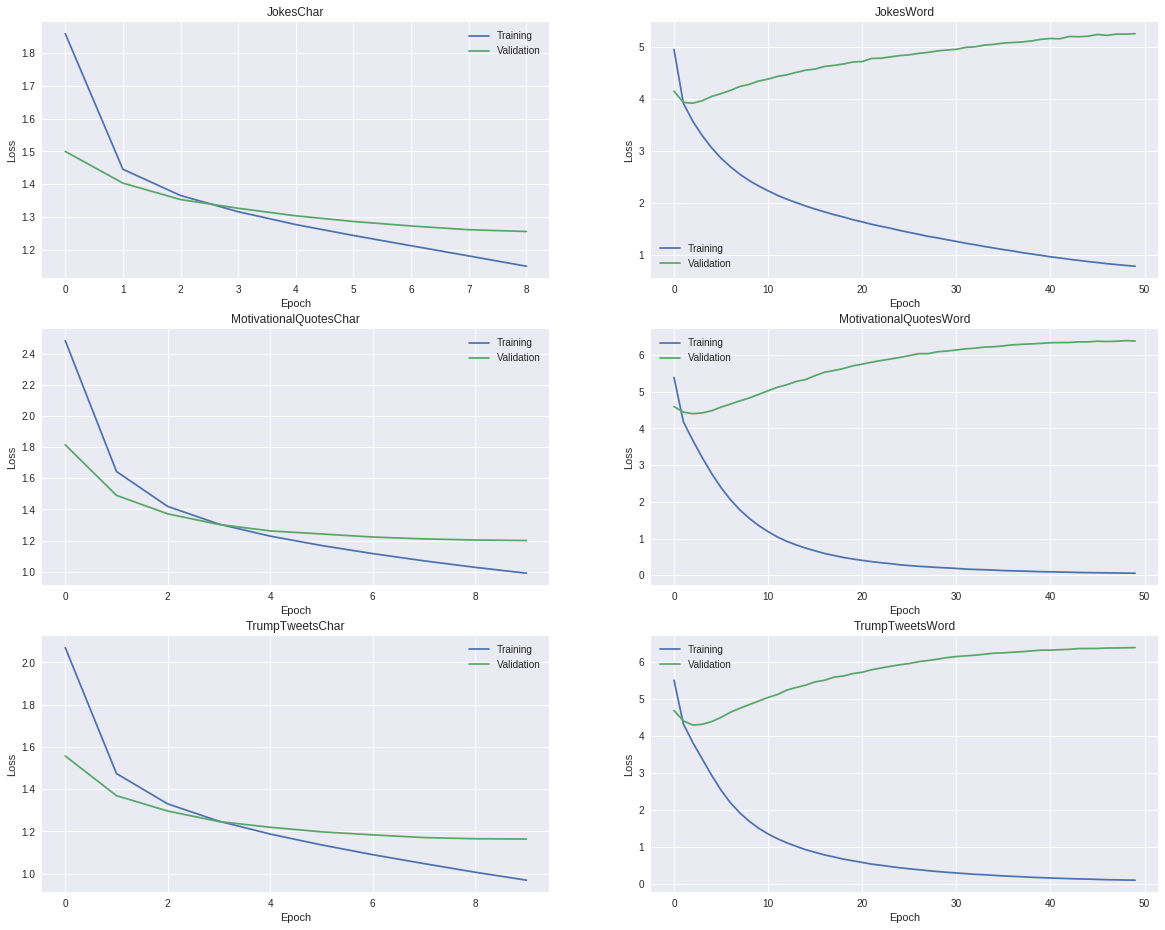

In [37]:
# extract and plot model loss
plt.figure(figsize=(20, 16))
ind = 1
for f in sorted(files):
  loss = []
  val_loss = []
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    lines = inputTxt.readlines()
    for l in lines:
      if len(l)>30:
        if '==============================' in l:
          losses = re.findall("\d+\.\d+", l)
          if len(losses)==2:
            loss.append(float(losses[0]))
            val_loss.append(float(losses[1]))
  plt.subplot(len(files)/2, 2, ind) 
  plt.plot(loss, label = 'Training')
  plt.plot(val_loss, label = 'Validation')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title(f.replace('.txt', ''))
  plt.legend()
  ind +=1
plt.show()          

## Medium Texts

In [0]:
# collect file names
folder = './MediumText/'
files = os.listdir(folder)

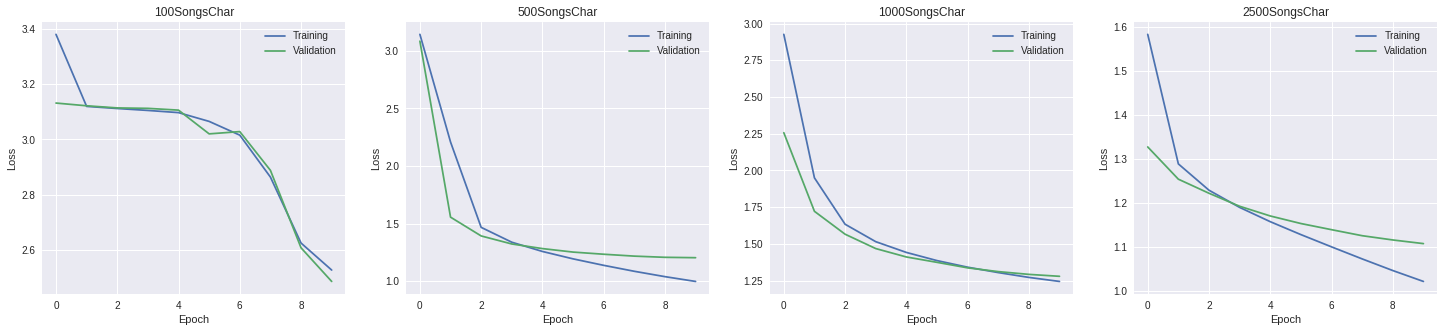

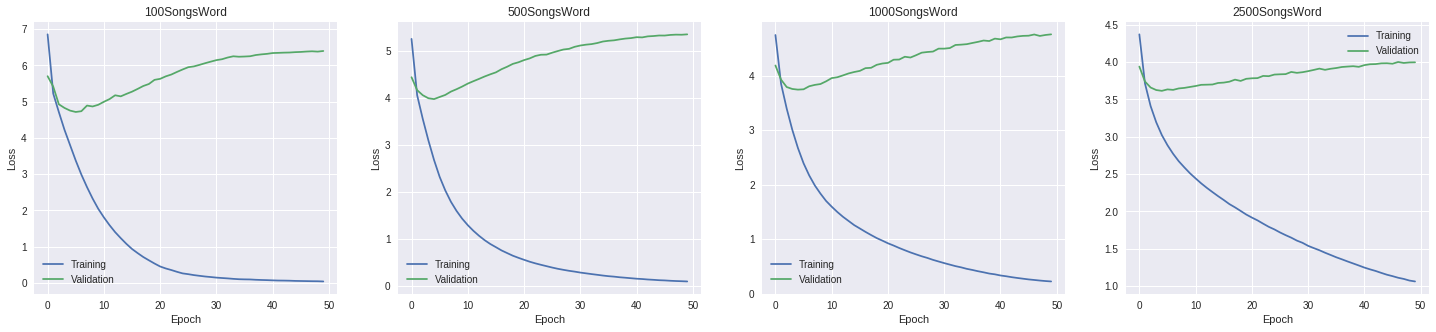

In [67]:
# extract and plot model loss
for f in sorted(files):
  plt.figure(figsize=(25, 5))
  ind = 1
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    mods = inputTxt.read().split('Training with ')
    mods = [m.split('\n') for m in mods if len(m)>0]
    for lines in mods:
      n = lines[0].split()[0]
      loss = []
      val_loss = []
      for l in lines:
        if len(l)>30:
          if '==============================' in l:
            losses = re.findall("\d+\.\d+", l)
            if len(losses)==2:
              loss.append(float(losses[0]))
              val_loss.append(float(losses[1]))
      plt.subplot(1, len(mods), ind) 
      plt.plot(loss, label = 'Training')
      plt.plot(val_loss, label = 'Validation')
      plt.ylabel('Loss')
      plt.xlabel('Epoch')
      plt.title(str(n)+f.replace('.txt', ''))
      plt.legend()
      ind +=1
    plt.show()          

# Generate Text from Trained Models

In [69]:
% cd ../TrainedModels
! ls

/content/gdrive/My Drive/NLPProject/TrainedModels
MediumText  ShortText


In [70]:
! ls ShortText

char_jokes_config.json		       word_jokes_config.json
char_jokes_textgenrnn_texts.txt        word_jokes_textgenrnn_texts.txt
char_jokes_vocab.json		       word_jokes_vocab.json
char_jokes_weights.hdf5		       word_jokes_weights.hdf5
char_motivational_quotes_config.json   word_motivational_quotes_config.json
char_motivational_quotes_vocab.json    word_motivational_quotes_vocab.json
char_motivational_quotes_weights.hdf5  word_motivational_quotes_weights.hdf5
char_trump_tweets_config.json	       word_trump_tweets_config.json
char_trump_tweets_vocab.json	       word_trump_tweets_vocab.json
char_trump_tweets_weights.hdf5	       word_trump_tweets_weights.hdf5


In [71]:
! ls MediumText

char_songs1000_config.json   word_songs1000_config.json
char_songs1000_vocab.json    word_songs1000_vocab.json
char_songs1000_weights.hdf5  word_songs1000_weights.hdf5
char_songs100_config.json    word_songs100_config.json
char_songs100_vocab.json     word_songs100_vocab.json
char_songs100_weights.hdf5   word_songs100_weights.hdf5
char_songs2500_config.json   word_songs2500_config.json
char_songs2500_vocab.json    word_songs2500_vocab.json
char_songs2500_weights.hdf5  word_songs2500_weights.hdf5
char_songs500_config.json    word_songs500_config.json
char_songs500_vocab.json     word_songs500_vocab.json
char_songs500_weights.hdf5   word_songs500_weights.hdf5


In [14]:
# source https://github.com/minimaxir/textgenrnn
! pip install textgenrnn
from textgenrnn import textgenrnn

    100% |████████████████████████████████| 1.7MB 6.1MB/s 
  Running setup.py bdist_wheel for textgenrnn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/30/96/f7/bc7042ea671bc79455c244af21050a7a32d604fe2f7a44e322
Successfully built textgenrnn


Using TensorFlow backend.


In [0]:
dir = './ShortText/'
texts = ['trump_tweets', 'motivational_quotes', 'jokes']
for text in texts:
  mod = 'char_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  textgen.generate_samples(max_gen_length=900, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=900, n=15)

  mod = 'word_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  textgen.generate_samples(max_gen_length=180, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=180, n=15)

####################
Temperature: 0.2
####################
l not be a great honor to host our country and protect our Country and the Democrats are not looking forward to seeing the people of the U.S. has a great honor to host our new Attorney General John Kelly is a total disaster for our Country will be interviewed by the Democrats are now they don’t want to see the Fake News Media is a total disaster for the United States of American families and the Democrats are now they don’t want to see the big progress being removed for the United States Supreme Court Justice of the United States Supreme Court Justice of the United States of American history. It is a total problem in the FBI and her the best in the U.S. is strong on Crime, the FBI and the Democrats are coming back to the U.S. is a big day for the people of the FBI and the FBI and his political problem in the people of the FBI and all of the people of the U.S. is a big campaign and expect

####################
Temperature: 0.5
#

In [0]:
dir = './MediumText/'
texts = ['songs100', 'songs500','songs1000', 'songs2500']
for text in texts:
  mod = 'char_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  textgen.generate_samples(max_gen_length=15000, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=4000, n=8)

  mod = 'word_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  textgen.generate_samples(max_gen_length=3000, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=800, n=8)